#  PUC-RIO - Curso de Pós-Graduação em Ciência de Dados e Analytics
### Aluno: Ricardo Simplicio - ricardo.simplicio.lima@gmail.com
### MVP - Sprint Engenharia de Dados

### 1. OBJETIVO

O objetivo deste trabalhado projeto é reproduzir o Data Warehouse que reune os dados de e-commerce do Brasil do período de 2016 a 2018. Com estes dados será possível explanar as seguintes questões, com ressalvas às limitações dos dados utilizados:

 a) Qual o ranking reginoal de vendas on-line no Brasil?

 b) Qual a categoria de produtos que mais venderam?

 c) Quais são mais representativas em relação valor de compra?



### 2. COLETA DE DADOS

Para os objetivos traçado foram colatados os dados de e-commerce disponibilizados na plataforma kaggle acessadas atravéz do link:

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Esta base de dados pública foi disponibilizada pela Olist Store, com licença de uso CC BY-NC-SA 4.0, ou seja, pode ser compartilhada, adaptada, no entanto que seja dados seus créditos e uso sem fins lucrativos, neste caso acadêmico.

ESte dados são estrutuados, em arquivos .csv, sendo composta pelas seguintes tabelas:

olist_customers_dataset.csv

olist_order_items_dataset.csv

olist_order_payments_dataset.csv

olist_order_reviews_dataset.csv

olist_orders_dataset.csv

olist_products_dataset.csv

olist_sellers_dataset.csv

product_category_name_transla.csv





### 3. MODELAGEM

In [0]:
%pip install matplotlib



Python interpreter will be restarted.
Python interpreter will be restarted.


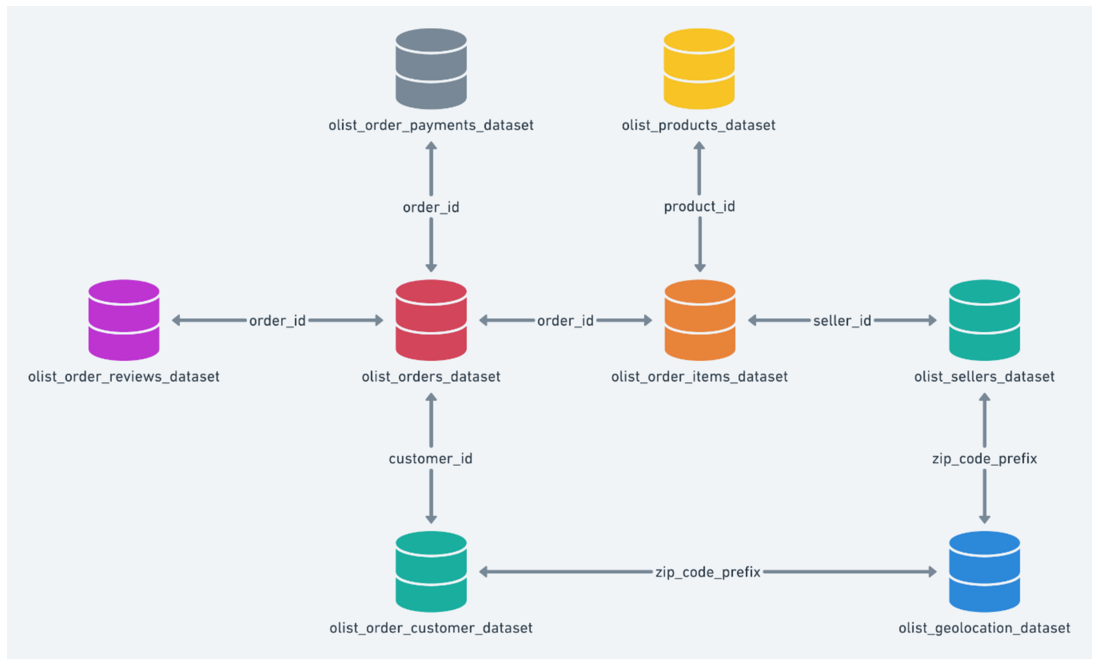

In [0]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

spark = SparkSession.builder.appName("Imagem").getOrCreate()
dbutils.fs.cp("dbfs:/FileStore/tables/Modelo_de_Dados-1.png", "file:/tmp/Modelo_de_Dados-1.png")
img = mpimg.imread("/tmp/Modelo_de_Dados-1.png")
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.axis('off')  
plt.show()

**3.1. Carregando os arquivos para o DBFS**

**3.1.1 Instalando o pyspark**

In [0]:
%pip install pyspark

Python interpreter will be restarted.


**3.1.2 Importando as bibliotecas Sparksession**

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from pyspark.sql.types import StructType, StructField, StringType, IntegerType
from pyspark.sql.functions import col

**3.1.3 Leitura inicial das Tabelas carregadas**

In [0]:
df_customers = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_customers_dataset-1.csv")
df_geolocation = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_geolocation_dataset.csv")
df_items = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_order_items_dataset.csv")
df_payments = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_order_payments_dataset.csv")
df_reviews = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_order_reviews_dataset.csv")
df_products = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_products_dataset.csv")
df_sellers = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_sellers_dataset.csv")
df_catname = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/product_category_name_translation.csv")
df_order = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load("dbfs:/FileStore/tables/olist_orders_dataset.csv")

**3.2 Contabilizando o tamanho das  tabelas carregadas através do número de linhas**

  Criando duas listas, uma para catalogar os dataframes e outras com os nomes dos dataframes e assim fazer uma apresentação atuomatizada através de loop for para mostrar alugmas características por meio de um só codigo.

In [0]:
spark = SparkSession.builder.appName("Contagem de Linhas").getOrCreate()

dataframes = [df_customers, df_geolocation, df_items, df_payments, df_reviews, df_sellers, df_catname, df_products, df_order]
nomes_tabelas = ["df_customers", "df_geolocation", "df_items", "df_payments", "df_reviews", "df_sellers", "df_catname","df_products","df_order"]

for nome, df in zip(nomes_tabelas, dataframes):
    contagem_linhas = df.count()
    print(f"Tabela: {nome}, Linhas: {contagem_linhas}")

Tabela: df_customers, Linhas: 99441
Tabela: df_geolocation, Linhas: 1000163
Tabela: df_items, Linhas: 112650
Tabela: df_payments, Linhas: 103886
Tabela: df_reviews, Linhas: 104162
Tabela: df_sellers, Linhas: 3095
Tabela: df_catname, Linhas: 71
Tabela: df_products, Linhas: 32951
Tabela: df_order, Linhas: 99441


**3.3 Verificando os metadados das tabelas**

      Incluindo a verificação das chaves acima apresentadas acima e o já com reconhecimento automático do  schema de cada dataframe

In [0]:
for nome, df in zip(nomes_tabelas, dataframes):
    print(f"Tabela: {nome}")
    print("Schema:")
    df.printSchema()

Tabela: df_customers
Schema:
root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_state: string (nullable = true)

Tabela: df_geolocation
Schema:
root
 |-- geolocation_zip_code_prefix: integer (nullable = true)
 |-- geolocation_lat: double (nullable = true)
 |-- geolocation_lng: double (nullable = true)
 |-- geolocation_city: string (nullable = true)
 |-- geolocation_state: string (nullable = true)

Tabela: df_items
Schema:
root
 |-- order_id: string (nullable = true)
 |-- order_item_id: integer (nullable = true)
 |-- product_id: string (nullable = true)
 |-- seller_id: string (nullable = true)
 |-- shipping_limit_date: timestamp (nullable = true)
 |-- price: double (nullable = true)
 |-- freight_value: double (nullable = true)

Tabela: df_payments
Schema:
root
 |-- order_id: string (nullable = true)
 |-- payment_sequential: in

**3.4 Apresentando as linhas iniciais de cada tabela.**

In [0]:

for nome, df in zip(nomes_tabelas, dataframes):
    print(f"Tabela: {nome}")
    
    display(df.limit(5))

Tabela: df_customers


customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Tabela: df_geolocation


geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1037,-23.54562128115268,-46.63929204800168,sao paulo,SP
1046,-23.546081127035535,-46.64482029837157,sao paulo,SP
1046,-23.54612896641469,-46.64295148361138,sao paulo,SP
1041,-23.5443921648681,-46.63949930627844,sao paulo,SP
1035,-23.541577961711493,-46.64160722329613,sao paulo,SP


Tabela: df_items


order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19T09:45:35.000+0000,58.9,13.29
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03T11:05:13.000+0000,239.9,19.93
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18T14:48:30.000+0000,199.0,17.87
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15T10:10:18.000+0000,12.99,12.79
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13T13:57:51.000+0000,199.9,18.14


Tabela: df_payments


order_id,payment_sequential,payment_type,payment_installments,payment_value
b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Tabela: df_reviews


review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,null,null,2018-01-18 00:00:00,2018-01-18 21:46:59
80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,null,null,2018-03-10 00:00:00,2018-03-11 03:05:13
228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,null,null,2018-02-17 00:00:00,2018-02-18 14:36:24
e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,null,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,null,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


Tabela: df_sellers


seller_id,seller_zip_code_prefix,seller_city,seller_state
3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Tabela: df_catname


product_category_name,product_category_name_english
beleza_saude,health_beauty
informatica_acessorios,computers_accessories
automotivo,auto
cama_mesa_banho,bed_bath_table
moveis_decoracao,furniture_decor


Tabela: df_products


product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40,287,1,225,16,10,14
3aa071139cb16b67ca9e5dea641aaa2f,artes,44,276,1,1000,30,18,20
96bd76ec8810374ed1b65e291975717f,esporte_lazer,46,250,1,154,18,9,15
cef67bcfe19066a932b7673e239eb23d,bebes,27,261,1,371,26,4,26
9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37,402,4,625,20,17,13


Tabela: df_order


order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02T10:56:33.000+0000,2017-10-02T11:07:15.000+0000,2017-10-04T19:55:00.000+0000,2017-10-10T21:25:13.000+0000,2017-10-18T00:00:00.000+0000
53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24T20:41:37.000+0000,2018-07-26T03:24:27.000+0000,2018-07-26T14:31:00.000+0000,2018-08-07T15:27:45.000+0000,2018-08-13T00:00:00.000+0000
47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08T08:38:49.000+0000,2018-08-08T08:55:23.000+0000,2018-08-08T13:50:00.000+0000,2018-08-17T18:06:29.000+0000,2018-09-04T00:00:00.000+0000
949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18T19:28:06.000+0000,2017-11-18T19:45:59.000+0000,2017-11-22T13:39:59.000+0000,2017-12-02T00:28:42.000+0000,2017-12-15T00:00:00.000+0000
ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13T21:18:39.000+0000,2018-02-13T22:20:29.000+0000,2018-02-14T19:46:34.000+0000,2018-02-16T18:17:02.000+0000,2018-02-26T00:00:00.000+0000


**2.5 Verificando linhas duplicadas para todos os Dataframes**

In [0]:
from pyspark.sql.functions import col, count
from pyspark.sql import SparkSession

for df, name in zip(dataframes, nomes_tabelas):
    print(f"Verificando duplicatas no DataFrame: {name}")
    duplicatas = (
        df.groupBy(df.columns).agg(count("*").alias("count")).filter(col("count") > 1)
    )
    if duplicatas.count() > 0:
        print(f"Duplicatas encontradas no DataFrame {name}:")
    
    else:
        print(f"Nenhuma duplicata encontrada no DataFrame {name}.")
     

Verificando duplicatas no DataFrame: df_customers
Nenhuma duplicata encontrada no DataFrame df_customers.
Verificando duplicatas no DataFrame: df_geolocation
Duplicatas encontradas no DataFrame df_geolocation:
Verificando duplicatas no DataFrame: df_items
Nenhuma duplicata encontrada no DataFrame df_items.
Verificando duplicatas no DataFrame: df_payments
Nenhuma duplicata encontrada no DataFrame df_payments.
Verificando duplicatas no DataFrame: df_reviews
Duplicatas encontradas no DataFrame df_reviews:
Verificando duplicatas no DataFrame: df_sellers
Nenhuma duplicata encontrada no DataFrame df_sellers.
Verificando duplicatas no DataFrame: df_catname
Nenhuma duplicata encontrada no DataFrame df_catname.
Verificando duplicatas no DataFrame: df_products
Nenhuma duplicata encontrada no DataFrame df_products.
Verificando duplicatas no DataFrame: df_order
Nenhuma duplicata encontrada no DataFrame df_order.


In [0]:
for df, name in zip(dataframes, nomes_tabelas):
    print(f"Verificando duplicatas no DataFrame: {name}")
    duplicatas = (
        df.groupBy(df.columns).agg(count("*").alias("count")).filter(col("count") > 1)
    )
    if duplicatas.count() > 0:
        duplicatas.show()
    else:
        duplicatas.show()

Verificando duplicatas no DataFrame: df_customers
+-----------+------------------+------------------------+-------------+--------------+-----+
|customer_id|customer_unique_id|customer_zip_code_prefix|customer_city|customer_state|count|
+-----------+------------------+------------------------+-------------+--------------+-----+
+-----------+------------------+------------------------+-------------+--------------+-----+

Verificando duplicatas no DataFrame: df_geolocation
+---------------------------+-------------------+-------------------+----------------+-----------------+-----+
|geolocation_zip_code_prefix|    geolocation_lat|    geolocation_lng|geolocation_city|geolocation_state|count|
+---------------------------+-------------------+-------------------+----------------+-----------------+-----+
|                       1026| -23.53925652899767|-46.633440525535235|       sao paulo|               SP|    2|
|                       1106|-23.531062064948905|-46.629505278925556|       sao p

**Ao verificar que o dataframe df_geolocation tem linhas repetidas e considerando suas colunas significa dizer que algumas compras listadas neste dataframe dstão relacionadas com o mesmo local, ou seja, o usuário fazendo compras mais de uma vez.**

**Entretanto o dataframe df_reviews constam regristros duplicado, para os quais contem data e tempo exato do reviws leva a crer que nesta tabela constam linhas registros duplicados de revisões de compras.**

In [0]:
spark = SparkSession.builder.appName("VerificandoDupliacatas").getOrCreate()

duplicatas = df_reviews.groupBy(df_reviews.columns).agg(count("*").alias("count")).filter(col("count") > 1)

duplicatas.show()

+--------------------+--------------------+-------------------+--------------------+----------------------+--------------------+-----------------------+-----+
|           review_id|            order_id|       review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|count|
+--------------------+--------------------+-------------------+--------------------+----------------------+--------------------+-----------------------+-----+
|,2017-09-09 00:00...|                null|               null|                null|                  null|                null|                   null|    2|
|Bem antes do praz...|                null|               null|                null|                  null|                null|                   null|    2|
|A única coisa que...| 2017-11-22 00:00:00|2017-11-23 14:53:55|                null|                  null|                null|                   null|    2|
|,2017-04-11 00:00...|                null|   

In [0]:
df_reviews_sem_duplicatas = df_reviews.dropDuplicates()

df_reviews_sem_duplicatas.count()


Out[9]: 104077

In [0]:
df_reviews_sem_duplicatas.show()

+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|           review_id|            order_id|review_score|review_comment_title|review_comment_message|review_creation_date|review_answer_timestamp|
+--------------------+--------------------+------------+--------------------+----------------------+--------------------+-----------------------+
|4b49719c8a200003f...|9d6f15f95d01e79bd...|           4|                null|  Mas um pouco ,tra...|                null|                   null|
|8670d52e15e00043a...|b9bf720beb4ab3728...|           4|           recomendo|  aparelho eficient...| 2018-05-22 00:00:00|    2018-05-23 16:45:47|
|96052551d87e5f62e...|3d374c9e46530bb5e...|           5|                null|                  null| 2017-12-19 00:00:00|    2017-12-20 10:25:22|
|f7c4243c7fe1938f1...|8e6bfb81e283fa7e4...|           5|                null|  Parabéns lojas la...| 2018-03-01 00:00:00|   

**Através do código acima foram retiradas as duplicatas do dataframe df_reviews, criando assim o data_frame df_reviews_sem_duplicatas**

**2.6 Catálogo de Dados**

Verificando dos valores máximos e mínimos de cada coluna do dataframe

In [0]:
from pyspark.sql.types import IntegerType, FloatType, DoubleType, DateType
from pyspark.sql.functions import col, max, min
from pyspark.sql import DataFrame


dataframes = [df_customers, df_geolocation, df_items, df_payments, df_reviews, df_sellers, df_catname, df_products]

def max_min_values(df: DataFrame):
    # Identificar colunas numéricas e de datas
    numeric_date_cols = [c.name for c in df.schema if isinstance(c.dataType, (IntegerType, FloatType, DoubleType, DateType))]
    # Agregar máximos e mínimos para as colunas numéricas e de datas
    max_min_df = df.agg(*[max(col(c)).alias(f"{c}_max") for c in numeric_date_cols] + [min(col(c)).alias(f"{c}_min") for c in numeric_date_cols])
    
    return max_min_df

# Iterar sobre os DataFrames e exibir os resultados
for i, df in enumerate(dataframes):
    result_df = max_min_values(df)
    print(f"DataFrame {i+1} - Máximos e Mínimos para colunas numéricas e de datas")
    display(result_df)  # Se estiver usando Databricks
    # result_df.show()  # Use isto se não estiver usando Databricks

DataFrame 1 - Máximos e Mínimos para colunas numéricas e de datas


customer_zip_code_prefix_max,customer_zip_code_prefix_min
99990,1003


DataFrame 2 - Máximos e Mínimos para colunas numéricas e de datas


geolocation_zip_code_prefix_max,geolocation_lat_max,geolocation_lng_max,geolocation_zip_code_prefix_min,geolocation_lat_min,geolocation_lng_min
99990,45.06593318269697,121.10539381057764,1001,-36.6053744107061,-101.46676644931476


DataFrame 3 - Máximos e Mínimos para colunas numéricas e de datas


order_item_id_max,price_max,freight_value_max,order_item_id_min,price_min,freight_value_min
21,6735.0,409.68,1,0.85,0.0


DataFrame 4 - Máximos e Mínimos para colunas numéricas e de datas


payment_sequential_max,payment_installments_max,payment_value_max,payment_sequential_min,payment_installments_min,payment_value_min
29,24,13664.08,1,0,0.0


---------------------------------------------------------------------------
AssertionError                            Traceback (most recent call last)
File <command-430799420904133>:18
     16 # Iterar sobre os DataFrames e exibir os resultados
     17 for i, df in enumerate(dataframes):
---> 18     result_df = max_min_values(df)
     19     print(f"DataFrame {i+1} - Máximos e Mínimos para colunas numéricas e de datas")
     20     display(result_df)

File <command-430799420904133>:12, in max_min_values(df)
     10 numeric_date_cols = [c.name for c in df.schema if isinstance(c.dataType, (IntegerType, FloatType, DoubleType, DateType))]
     11 # Agregar máximos e mínimos para as colunas numéricas e de datas
---> 12 max_min_df = df.agg(*[max(col(c)).alias(f"{c}_max") for c in numeric_date_cols] + [min(col(c)).alias(f"{c}_min") for c in numeric_date_cols])
     14 return max_min_df

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*arg

**A mensagem que de expressão vazia se deve ao fato que não existir colunas de datas em algun dataframes.**

### 3. Análise

**a) Qual o ranking regional de vendas on-line no Brasil?**

+----------------+------------------+---------------+
|     seller_city|       total_sales|total_sales_brl|
+----------------+------------------+---------------+
|       sao paulo|2702878.1400000458|R$ 2,702,878.14|
|        ibitinga| 624592.9399999897|  R$ 624,592.94|
|        curitiba|470759.81999999756|  R$ 470,759.82|
|  rio de janeiro|358413.58999999973|  R$ 358,413.59|
|       guarulhos|329494.38000000006|  R$ 329,494.38|
|  ribeirao preto| 275976.4400000003|  R$ 275,976.44|
| itaquaquecetuba|230568.11999999973|  R$ 230,568.12|
|         guariba| 229472.6300000005|  R$ 229,472.63|
|     santo andre| 228561.5999999995|  R$ 228,561.60|
|lauro de freitas|225525.05000000002|  R$ 225,525.05|
+----------------+------------------+---------------+



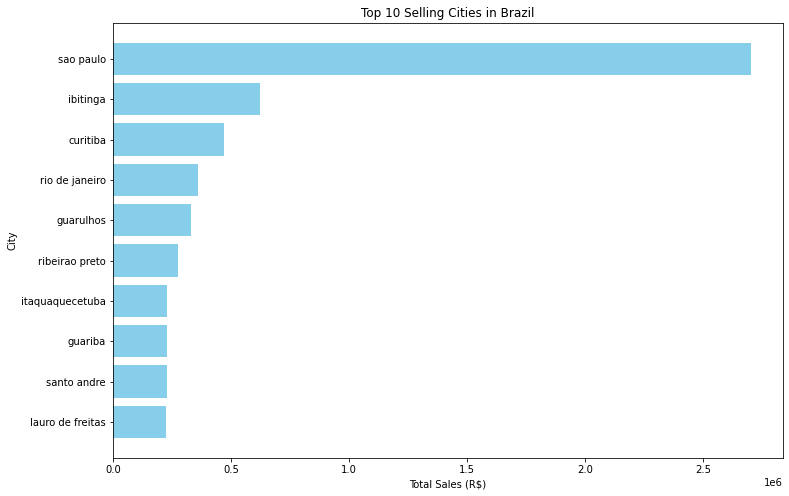

In [0]:
from pyspark.sql.functions import col, sum, format_number, concat, lit

df_joined = df_items.join(df_sellers, df_items["seller_id"] == df_sellers["seller_id"])

df_vendas_por_cidade = df_joined.groupBy("seller_city").agg(sum("price").alias("total_sales")) # finalmente aprendi a fazer este join

df_melhores_cidades = df_vendas_por_cidade.orderBy(col("total_sales").desc()).limit(10)

df_melhores_cidades = df_melhores_cidades.withColumn(
    "total_sales_brl", 
    concat(lit("R$ "), format_number(col("total_sales"), 2)) # em formato de moeda real
)


df_melhores_cidades = df_melhores_cidades.select("seller_city", "total_sales", "total_sales_brl")
df_melhores_cidades.show(truncate = True)
pdf_melhores_cidades = df_melhores_cidades.toPandas()


import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.barh(pdf_melhores_cidades['seller_city'], pdf_melhores_cidades['total_sales'], color='skyblue')
plt.xlabel('Total Sales (R$)')
plt.ylabel('City')
plt.title('Top 10 Selling Cities in Brazil')
plt.gca().invert_yaxis()  # Eixo invertido
plt.show()


**b) Qual a categoria de produtos que mais venderam?**

+----------------------+------------------+
|product_category_name |total_sales       |
+----------------------+------------------+
|beleza_saude          |1258681.3399999938|
|relogios_presentes    |1205005.679999998 |
|cama_mesa_banho       |1036988.6799999807|
|esporte_lazer         |988048.9699999837 |
|informatica_acessorios|911954.319999988  |
|moveis_decoracao      |729762.4899999866 |
|cool_stuff            |635290.8499999974 |
|utilidades_domesticas |632248.6599999928 |
|automotivo            |592720.109999997  |
|ferramentas_jardim    |485256.45999999647|
+----------------------+------------------+



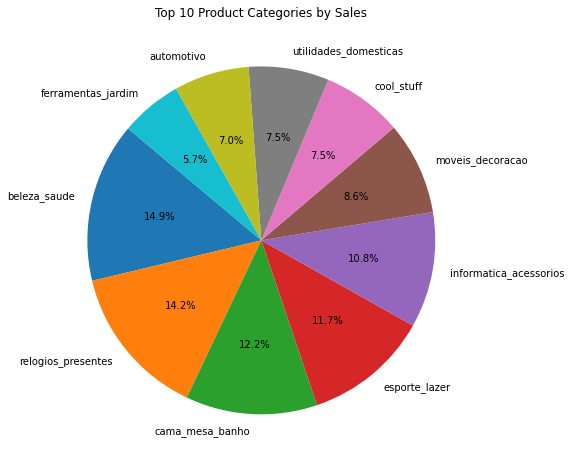

In [0]:
df_joined = df_items.join(df_products, df_items["product_id"] == df_products["product_id"])

df_vendas_por_categoria = df_joined.groupBy("product_category_name").agg(sum("price").alias("total_sales"))

df_melhores_categorias = df_vendas_por_categoria.orderBy(col("total_sales").desc()).limit(10)

df_melhores_categorias.show(truncate=False)

pdf_melhores_categorias = df_melhores_categorias.toPandas()

pdf_melhores_categorias['percent'] = (pdf_melhores_categorias['total_sales'] / pdf_melhores_categorias['total_sales'].sum()) * 100

plt.figure(figsize=(10, 8))
plt.pie(pdf_melhores_categorias['total_sales'], labels=pdf_melhores_categorias['product_category_name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Product Categories by Sales')
plt.show()

**c) Quais são mais representativas em relação valor de compra?**

+--------------+------------------+
|customer_city |total_sales       |
+--------------+------------------+
|sao paulo     |1914924.5400000243|
|rio de janeiro|992538.8599999857 |
|belo horizonte|355611.1299999999 |
|brasilia      |301920.25         |
|curitiba      |211738.0600000005 |
|porto alegre  |190562.08000000048|
|campinas      |187844.53000000052|
|salvador      |181104.4200000004 |
|guarulhos     |144268.39000000042|
|niteroi       |117907.12000000023|
+--------------+------------------+



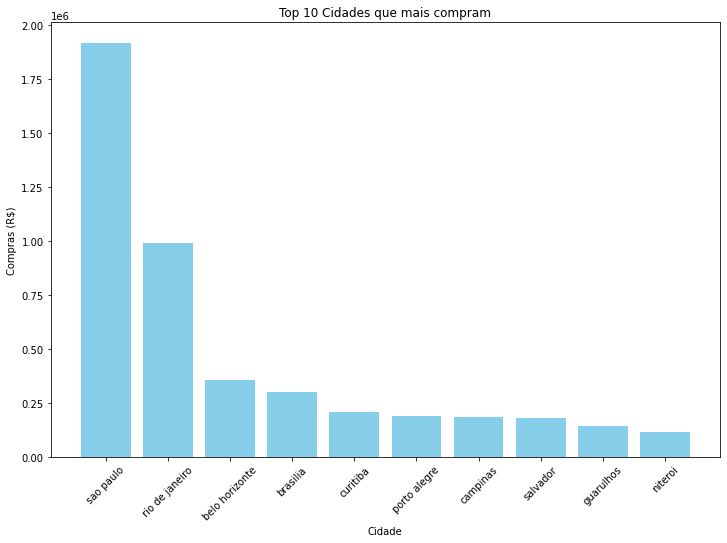

In [0]:
from pyspark.sql.functions import col, sum
import matplotlib.pyplot as plt

df_itens_ordens = df_items.join(df_order, df_items["order_id"] == df_order["order_id"])
df_joined2 = df_itens_ordens.join(df_customers, df_itens_ordens["customer_id"] == df_customers["customer_id"]) # fazendo o segundo join

df_compras_cidades = df_joined2.groupBy("customer_city").agg(sum("price").alias("total_sales"))

df_cidades_compradoras = df_compras_cidades.orderBy(col("total_sales").desc()).limit(10)

df_cidades_compradoras.show(truncate=False)

pdf_cidades_compradoras = df_cidades_compradoras.toPandas()

plt.figure(figsize=(12, 8))
plt.bar(pdf_top_cities['customer_city'], pdf_top_cities['total_sales'], color='skyblue')
plt.xlabel('Cidade')
plt.ylabel('Compras (R$)')
plt.title('Top 10 Cidades que mais compram')
plt.xticks(rotation=45)
plt.show()
